# Similarities

All similarities are numeric

In [1]:
import numpy as np
import pandas as pd
import scipy.spatial.distance as dist
import scipy.stats as stats
import matplotlib.pyplot as plt
import dzcnapy_plotlib as dzcnapy

## Hamming distance

In [2]:
data = {
    "potato" : {"shape": "round", "color": "yellowish", "starchy": True},
    "carrot" : {"shape": "conic", "color": "orange", "starchy": False},
    "corn" : {"shape": "conic", "color": "yellowish", "starchy": True},
    "turnip" : {"shape": "round", "color": "yellowish", "starchy": False}
    }

In [3]:
data

{'carrot': {'color': 'orange', 'shape': 'conic', 'starchy': False},
 'corn': {'color': 'yellowish', 'shape': 'conic', 'starchy': True},
 'potato': {'color': 'yellowish', 'shape': 'round', 'starchy': True},
 'turnip': {'color': 'yellowish', 'shape': 'round', 'starchy': False}}

In [4]:
atts = set.union(*[set(x.keys()) for x in data.values()])

In [5]:
atts

{'color', 'shape', 'starchy'}

In [6]:
sim_2dlist = [[sum(data[v1][att] == data[v2][att] for att in atts) \
                   / len(atts) for v1 in data] for v2 in data]

In [7]:
sim_2dlist

[[1.0, 0.0, 0.6666666666666666, 0.6666666666666666],
 [0.0, 1.0, 0.3333333333333333, 0.3333333333333333],
 [0.6666666666666666, 0.3333333333333333, 1.0, 0.3333333333333333],
 [0.6666666666666666, 0.3333333333333333, 0.3333333333333333, 1.0]]

In [8]:
sim_2dlist = [[1 - dist.hamming(list(data[v1].values()),
                                list(data[v2].values())) for v1 in data]
              for v2 in data]

In [9]:
sim_2dlist

[[1.0, 0.0, 0.66666666666666674, 0.66666666666666674],
 [0.0, 1.0, 0.33333333333333337, 0.33333333333333337],
 [0.66666666666666674, 0.33333333333333337, 1.0, 0.33333333333333337],
 [0.66666666666666674, 0.33333333333333337, 0.33333333333333337, 1.0]]

In [10]:
sim_array = np.array(sim_2dlist)

In [11]:
sim_array

array([[ 1.        ,  0.        ,  0.66666667,  0.66666667],
       [ 0.        ,  1.        ,  0.33333333,  0.33333333],
       [ 0.66666667,  0.33333333,  1.        ,  0.33333333],
       [ 0.66666667,  0.33333333,  0.33333333,  1.        ]])

In [12]:
sim_dataframe = pd.DataFrame(sim_array, columns=data, index=data)

In [13]:
sim_dataframe

,potato,carrot,corn,turnip
potato,1.000000,0.000000,0.666667,0.666667
carrot,0.000000,1.000000,0.333333,0.333333
corn,0.666667,0.333333,1.000000,0.333333
turnip,0.666667,0.333333,0.333333,1.000000


## Manhattan distance


In [14]:
hwdata = [[65.78, 112.99],
          [71.52, 136.49],
          [69.40, 153.03],
          [68.22, 142.34],
          [67.79, 144.30]]

In [15]:
hwdata

[[65.78, 112.99],
 [71.52, 136.49],
 [69.4, 153.03],
 [68.22, 142.34],
 [67.79, 144.3]]

In [16]:
hw_array = np.array(hwdata)

In [17]:
hw_array

array([[  65.78,  112.99],
       [  71.52,  136.49],
       [  69.4 ,  153.03],
       [  68.22,  142.34],
       [  67.79,  144.3 ]])

In [18]:
five_guys = np.array([[dist.cityblock(x, y) for x in hw_array]
                      for y in hw_array])

In [19]:
five_guys

array([[  0.  ,  29.24,  43.66,  31.79,  33.32],
       [ 29.24,   0.  ,  18.66,   9.15,  11.54],
       [ 43.66,  18.66,   0.  ,  11.87,  10.34],
       [ 31.79,   9.15,  11.87,   0.  ,   2.39],
       [ 33.32,  11.54,  10.34,   2.39,   0.  ]])

## Normalized

In [21]:
hw_range = hw_array.max(axis=0) - hw_array.min(axis=0)

In [22]:
hw_range

array([  5.74,  40.04])

In [23]:
hw_norm = (hw_array - hw_array.min(axis=0)) / hw_range

In [24]:
hw_norm

array([[ 0.        ,  0.        ],
       [ 1.        ,  0.58691309],
       [ 0.63066202,  1.        ],
       [ 0.42508711,  0.73301698],
       [ 0.35017422,  0.78196803]])

In [27]:
five_guys_norm = np.array([[dist.cityblock(x, y) for x in hw_norm]
                           for y in hw_norm])

In [28]:
five_guys_norm

array([[ 0.        ,  1.58691309,  1.63066202,  1.15810409,  1.13214225],
       [ 1.58691309,  0.        ,  0.78242489,  0.72101679,  0.84488073],
       [ 1.63066202,  0.78242489,  0.        ,  0.47255793,  0.49851977],
       [ 1.15810409,  0.72101679,  0.47255793,  0.        ,  0.12386394],
       [ 1.13214225,  0.84488073,  0.49851977,  0.12386394,  0.        ]])

## Cosine distance
Hrs per year @ [7,12) mph
https://www.meteoblue.com/en/weather/forecast/modelclimate/

In [29]:
winds = {
    "Anchorage": (58,60,132,552,291,180,88,62,58,36,20,4,3,16,119,81),
    "Boston": (93,104,106,101,80,82,82,110,216,292,281,205,246,204,159,86),
    "Chicago": (115,195,122,109,86,120,157,210,273,196,139,101,113,106,
                107,115),
    "San Francisco": (35,67,156,616,1208,894,268,67,2,0,0,0,2,9,22,35)
    }

In [30]:
winds

{'Anchorage': (58,
  60,
  132,
  552,
  291,
  180,
  88,
  62,
  58,
  36,
  20,
  4,
  3,
  16,
  119,
  81),
 'Boston': (93,
  104,
  106,
  101,
  80,
  82,
  82,
  110,
  216,
  292,
  281,
  205,
  246,
  204,
  159,
  86),
 'Chicago': (115,
  195,
  122,
  109,
  86,
  120,
  157,
  210,
  273,
  196,
  139,
  101,
  113,
  106,
  107,
  115),
 'San Francisco': (35,
  67,
  156,
  616,
  1208,
  894,
  268,
  67,
  2,
  0,
  0,
  0,
  2,
  9,
  22,
  35)}

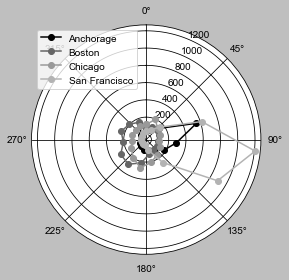

In [31]:
# Draw the wind roses
angles = np.linspace(0, 2 * np.pi, 16)
ax = plt.subplot(111, polar=True)
for name, wind in winds.items():
    ax.plot(angles, wind, "-o", label=name)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.legend(loc=2)
dzcnapy.plot("windroses")

In [32]:
wind_cities_cosine = pd.DataFrame({y: [1 - dist.cosine(winds[x], winds[y]) 
                                       for x in winds] for y in winds},
                                  index=winds.keys())

In [33]:
wind_cities_cosine

,Anchorage,Boston,Chicago,San Francisco
Anchorage,1.000000,0.408479,0.523189,0.791712
Boston,0.408479,1.000000,0.884222,0.264567
Chicago,0.523189,0.884222,1.000000,0.381017
San Francisco,0.791712,0.264567,0.381017,1.000000


## Pearson correlation

In [34]:
wind_cities_pearson = pd.DataFrame({y: [stats.pearsonr(winds[x], 
                                                       winds[y])[0] 
                                        for x in winds] for y in winds}, 
                                   index=winds.keys())

In [35]:
wind_cities_pearson

,Anchorage,Boston,Chicago,San Francisco
Anchorage,1.000000,-0.482339,-0.288015,0.704106
Boston,-0.482339,1.000000,0.234174,-0.524232
Chicago,-0.288015,0.234174,1.000000,-0.352705
San Francisco,0.704106,-0.524232,-0.352705,1.000000


In [36]:
pd.DataFrame(winds).corr()

,Anchorage,Boston,Chicago,San Francisco
Anchorage,1.000000,-0.482339,-0.288015,0.704106
Boston,-0.482339,1.000000,0.234174,-0.524232
Chicago,-0.288015,0.234174,1.000000,-0.352705
San Francisco,0.704106,-0.524232,-0.352705,1.000000
